# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

Explicitly list which notebook toolset was used (jupyter lab/jupyter notebook/VS Code/etc.) 

**here**: Jupyter Notebook, Pycharm

Explicitly and clearly state the chosen dataset number and title:
### Arbeitsmarkt ODÖ 
## 99. Gesamtübersicht über die Arbeitslosigkeit - Bestand, Zugang, Abgang


## E1 - Obtain and Scrub

In [4]:
# E0: setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import re


In [5]:
# E1:
# Personen in Schulung nach Alter und Berufswunsch - Bestand
# read csv file
df = pd.read_csv('Bestand_SC_Alter_Berufswunsch_RGS.csv', sep=';', encoding = 'ISO-8859-1', parse_dates=["Datum"])

df.info(), df['Unnamed: 8'].nunique()
# df['Unnamed 8'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921893 entries, 0 to 1921892
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Datum              datetime64[ns]
 1   RGSCode            int64         
 2   RGSName            object        
 3   Geschlecht         object        
 4   Altersgruppe       object        
 5   Berufs4Steller     object        
 6   Berufs4StellerBez  object        
 7   BESTAND            int64         
 8   Unnamed: 8         float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 132.0+ MB


(None, 0)

In [6]:
# drop unnötige Column
df.drop('Unnamed: 8', axis = 1, inplace = True)
df.head()

Datum  RGSCode     RGSName Geschlecht  Altersgruppe Berufs4Steller  \
0 2019-01-31      101  Eisenstadt     Frauen  bis 19 Jahre          B0254   
1 2019-01-31      101  Eisenstadt     Frauen  bis 19 Jahre          B1761   
2 2019-01-31      101  Eisenstadt     Frauen  bis 19 Jahre          B2105   
3 2019-01-31      101  Eisenstadt     Frauen  bis 19 Jahre          B2405   
4 2019-01-31      101  Eisenstadt     Frauen  bis 19 Jahre          B3631   

                             Berufs4StellerBez  BESTAND  
0  Tierzuchtgehilf(en)innen, Tierpfleger/innen        1  
1               Maler/innen, Anstreicher/innen        1  
2            Karosserie-, Kühlerspengler/innen        1  
3                      Elektromechaniker/innen        1  
4                                 Bäcker/innen        1

In [7]:
# definiere Geschlecht als Category, da nie mehr Werte zugelassen sein sollen
df['Geschlecht'] = df['Geschlecht'].astype('category') # only 2 values
df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1921888 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921889 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921890 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921891 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921892 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                B0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                B1761                     Maler/innen, Anstreicher/innen   
2                B2105                  Karosserie-, Kühlerspengler/innen   
3                B2405                            Elektromechaniker/innen   
4                B3631                                       Bäcker/innen   
...                ...                                                ...   
1921888          B7712             Laden-, Eintrittskartenkassier(e)innen   
1921889          B7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1921890          B8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1921891          B8101              Fürsorger/innen, Sozialarbeiter/innen   
1921892          B8371                                     Erzieher/innen   

         BESTAND  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
1921888        2  
1921889        2  
1921890        3  
1921891        1  
1921892        1  

[1921893 rows x 8 columns]

In [8]:
# Altersgruppe aufteilen, um Nummern separat als Int zu speichern (plotten, sortieren)
def sep_age(age_range):
    numbers = re.findall(r'\d+', age_range)
    if len(numbers) == 1:
        if age_range.startswith('bis'):
            return pd.Series([0, int(numbers[0])]) # bis 19 Jahre
        else:
            return pd.Series([int(numbers[0]), 99]) # 65 Jahre und älter
    elif len(numbers) == 2:
        # If two numbers, extract both as lower and upper bounds
        return pd.Series([int(numbers[0]), int(numbers[1])])
    return pd.Series([None, None])  # Fallback case (if no match)
 # Fill age_to with the found number
age = df['Altersgruppe'].apply(sep_age)
age

0   1
0         0  19
1         0  19
2         0  19
3         0  19
4         0  19
...      ..  ..
1921888  25  29
1921889  25  29
1921890  25  29
1921891  25  29
1921892  25  29

[1921893 rows x 2 columns]

In [9]:
# erstellen neuer Columns, um Altersgrenzen zu speichern
df['Alter_von'] = age[0]
df['Alter_bis'] = age[1]
df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1921888 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921889 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921890 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921891 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921892 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                B0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                B1761                     Maler/innen, Anstreicher/innen   
2                B2105                  Karosserie-, Kühlerspengler/innen   
3                B2405                            Elektromechaniker/innen   
4                B3631                                       Bäcker/innen   
...                ...                                                ...   
1921888          B7712             Laden-, Eintrittskartenkassier(e)innen   
1921889          B7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1921890          B8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1921891          B8101              Fürsorger/innen, Sozialarbeiter/innen   
1921892          B8371                                     Erzieher/innen   

         BESTAND  Alter_von  Alter_bis  
0              1          0         19  
1              1          0         19  
2              1          0         19  
3              1          0         19  
4              1          0         19  
...          ...        ...        ...  
1921888        2         25         29  
1921889        2         25         29  
1921890        3         25         29  
1921891        1         25         29  
1921892        1         25         29  

[1921893 rows x 10 columns]

In [10]:
# Anzahlen von BerufsCode und Bezeichnung vergleichen
print(df['Berufs4Steller'].nunique(), df['Berufs4StellerBez'].nunique())
df['Datum'].value_counts()

460 459


Datum
2024-02-29    31869
2021-04-30    31620
2024-04-30    31255
2021-03-31    31234
2024-01-31    30984
              ...  
2020-08-31    24155
2020-06-30    23823
2020-07-31    23536
2020-04-30    23280
2020-05-31    21949
Name: count, Length: 68, dtype: int64

In [11]:
# fehlende Daten pro column anschauen
missing_data = df.isnull().sum()
missing_percentages = round((missing_data / len(df)) * 100, 2)

missing_percentages.sort_values(ascending=False)

Berufs4StellerBez    0.03
Datum                0.00
RGSCode              0.00
RGSName              0.00
Altersgruppe         0.00
Geschlecht           0.00
Berufs4Steller       0.00
BESTAND              0.00
Alter_von            0.00
Alter_bis            0.00
dtype: float64

In [12]:
# erstellen eines neuen Datasets, welche Nan-Values enthält - für spätere Untersuchung
df_nan = df[df['Berufs4StellerBez'].isnull()] # dataset with NaN values (521 rows)
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1921893, 10)
(1921372, 10)


In [13]:
# erstellen eines neuen Datasets, welche "unbestimmte"-Values enthält - für spätere Untersuchung
df_unbest = df[df['Berufs4Steller']=='B9999'] # unbestimmt (nur Pst) ~Personenstammdaten? 
df_missing = pd.concat([df_unbest, df_nan])
print(df_unbest.shape)
print(f"Missing values percentage: {round((len(df_unbest) / len(df)) * 100, 2)}")
df_missing

(23219, 10)
Missing values percentage: 1.21


Datum  RGSCode                  RGSName Geschlecht  \
13      2019-01-31      101               Eisenstadt     Frauen   
110     2019-01-31      101               Eisenstadt     Männer   
260     2019-01-31      102              Mattersburg     Männer   
394     2019-01-31      103          Neusiedl am See     Männer   
1173    2019-01-31      202                 Hermagor     Frauen   
...            ...      ...                      ...        ...   
1788158 2024-04-30      501            Bischofshofen     Frauen   
1807003 2024-05-31      106              Stegersbach     Männer   
1837679 2024-06-30      108  Stegersbach/Jennersdorf     Männer   
1867228 2024-07-31      108  Stegersbach/Jennersdorf     Männer   
1895189 2024-08-31      108  Stegersbach/Jennersdorf     Männer   

            Altersgruppe Berufs4Steller     Berufs4StellerBez  BESTAND  \
13          bis 19 Jahre          B9999  unbestimmt (nur Pst)        1   
110         bis 19 Jahre          B9999  unbestimmt (nur Pst)        1   
260         bis 19 Jahre          B9999  unbestimmt (nur Pst)        2   
394      30 bis 34 Jahre          B9999  unbestimmt (nur Pst)        1   
1173     40 bis 44 Jahre          B9999  unbestimmt (nur Pst)        1   
...                  ...            ...                   ...      ...   
1788158  35 bis 39 Jahre              B                   NaN        1   
1807003     bis 19 Jahre              B                   NaN        1   
1837679     bis 19 Jahre              B                   NaN        1   
1867228     bis 19 Jahre              B                   NaN        1   
1895189     bis 19 Jahre              B                   NaN        1   

         Alter_von  Alter_bis  
13               0         19  
110              0         19  
260              0         19  
394             30         34  
1173            40         44  
...            ...        ...  
1788158         35         39  
1807003          0         19  
1837679          0         19  
1867228          0         19  
1895189          0         19  

[23740 rows x 10 columns]

In [14]:
# "unbestimmte" Daten aus dem Haupt-Dataset entfernen
print(df.shape)
df.drop(df[df['Berufs4Steller']=='B9999'].index, inplace=True)
print(df.shape)

(1921372, 10)
(1898153, 10)


In [15]:
# duplikate anzeigen; mit allen und einem Subset von Columns
print(df[df.duplicated(keep=False)]) # completely duplicated rows
subset = df.columns
subset = subset.drop('BESTAND')
print(df[df.duplicated(subset=subset, keep=False)])

Empty DataFrame
Columns: [Datum, RGSCode, RGSName, Geschlecht, Altersgruppe, Berufs4Steller, Berufs4StellerBez, BESTAND, Alter_von, Alter_bis]
Index: []
Empty DataFrame
Columns: [Datum, RGSCode, RGSName, Geschlecht, Altersgruppe, Berufs4Steller, Berufs4StellerBez, BESTAND, Alter_von, Alter_bis]
Index: []


In [16]:
# bereinigte Daten in ein csv File speichern (zu viele Daten für Excel)
df.to_csv('clean_data.csv')

In [17]:
# alle Datentypen anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1898153 entries, 0 to 1921892
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Datum              datetime64[ns]
 1   RGSCode            int64         
 2   RGSName            object        
 3   Geschlecht         category      
 4   Altersgruppe       object        
 5   Berufs4Steller     object        
 6   Berufs4StellerBez  object        
 7   BESTAND            int64         
 8   Alter_von          int64         
 9   Alter_bis          int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 146.6+ MB


In [18]:
# kleinstes, größtes und median Datum anzeigen
df['Datum'].min(), df['Datum'].median(), df['Datum'].max(),

(Timestamp('2019-01-31 00:00:00'),
 Timestamp('2021-12-31 00:00:00'),
 Timestamp('2024-08-31 00:00:00'))

In [19]:
# Anzahl der einzigartigen RGSCodes anzeigen und ihre Häufigkeit
print(df['RGSCode'].nunique())
df['RGSCode'].value_counts()

105


RGSCode
964    55830
630    52716
967    52090
965    49220
409    48793
       ...  
505     2486
202     1834
961     1582
613      585
108      544
Name: count, Length: 105, dtype: int64

In [20]:
# Anzahl der einzigartigen RGSNamen anzeigen und ihre Häufigkeit
print(df['RGSName'].nunique())
df['RGSName'].value_counts()

105


RGSName
Wien Favoritenstraße        55830
Graz-West und Umgebung      52716
Wien Huttengasse            52090
Wien Schönbrunner Straße    49220
Linz neu                    48793
                            ...  
Tamsweg                      2486
Hermagor                     1834
Wien Dresdner Straße         1582
Knittelfeld                   585
Stegersbach/Jennersdorf       544
Name: count, Length: 105, dtype: int64

In [21]:
# Anzahl der einzigartigen Geschlechter anzeigen und ihre Häufigkeit
print(df['Geschlecht'].nunique())
df['Geschlecht'].value_counts()

2


Geschlecht
Männer    955470
Frauen    942683
Name: count, dtype: int64

In [22]:
# Anzahl der einzigartigen Altersgruppen anzeigen und ihre Häufigkeit
print(df['Altersgruppe'].nunique())
df['Altersgruppe'].value_counts()

11


Altersgruppe
20 bis 24 Jahre       272416
25 bis 29 Jahre       251507
30 bis 34 Jahre       244531
35 bis 39 Jahre       237233
40 bis 44 Jahre       210020
bis 19 Jahre          205797
45 bis 49 Jahre       183434
50 bis 54 Jahre       156802
55 bis 59 Jahre       110821
60 bis 64 Jahre        25048
65 Jahre und älter       544
Name: count, dtype: int64

In [23]:
# kleinste, größte und median untere Altersgrenze 
df['Alter_von'].min(), df['Alter_von'].median(), df['Alter_von'].max()

(np.int64(0), np.float64(30.0), np.int64(65))

In [24]:
# kleinste, größte und median obere Altersgrenze 
df['Alter_bis'].min(), df['Alter_bis'].median(), df['Alter_bis'].max()

(np.int64(19), np.float64(34.0), np.int64(99))

In [25]:
# Anzahl der einzigartigen Berufs4Steller anzeigen und ihre Häufigkeit
print(df['Berufs4Steller'].nunique())
df['Berufs4Steller'].value_counts()

458


Berufs4Steller
B4018    76632
B3999    75646
B3901    64671
B7801    61537
B7841    61153
         ...  
B2807        1
B2741        1
B2701        1
B6328        1
B1939        1
Name: count, Length: 458, dtype: int64

In [26]:
# Anzahl der einzigartigen Berufs4StellerBezeichnungen anzeigen und ihre Häufigkeit
print(df['Berufs4StellerBez'].nunique())
df['Berufs4StellerBez'].value_counts()

458


Berufs4StellerBez
Sonstige Händler/innen u. Verkäufer/innen                       76632
Hilfsarbeiter/innen (Helfer), soweit nicht anderw. eing.        75646
Warensortierer, -nachseher, -adjustierer, -verpacker (m./w.)    64671
Industrie-, Gewerbekaufleute (m./w.), Kontorist(en)innen        61537
Büroberufe, Verwaltungshilfsberufe                              61153
                                                                ...  
Spuler/innen, Winder/innen, Zwirner/innen                           1
Rauhwarenzurichter/innen, -färber/innen                             1
Gerber/innen, Gerbarbeiter/innen                                    1
Sonstige Techniker/innen für Gärungstechnik                         1
Kessel-, Kupferschmiedhelfer/innen                                  1
Name: count, Length: 458, dtype: int64

In [27]:
# Anzahl der einzigartigen Bestände anzeigen + kleinste, größte und median von Bestand
print(df['BESTAND'].nunique())
print(df['BESTAND'].min(), df['BESTAND'].median(), df['BESTAND'].max())
df['BESTAND'].value_counts()


456
1 1.0 759


BESTAND
1      1256870
2       287170
3       123057
4        67349
5        40993
        ...   
399          1
246          1
429          1
232          1
406          1
Name: count, Length: 456, dtype: int64

In [28]:
# E2:


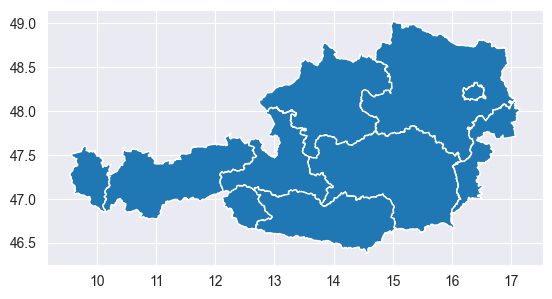

In [29]:
# geopandas_dataframe für Bundesländergrenzen laden
gdf = gpd.read_file("laender_95_geo.json")

gdf.plot()
plt.show()

In [30]:
gdf.head()

name iso                                           geometry
0        Vorarlberg   8  MULTIPOLYGON (((10.13171 47.03008, 10.12881 47...
1             Tirol   7  MULTIPOLYGON (((12.70891 46.73637, 12.71154 46...
2              Wien   9  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...
3    Oberösterreich   4  MULTIPOLYGON (((13.69179 47.57998, 13.69962 47...
4  Niederösterreich   3  MULTIPOLYGON (((16.25038 47.44879, 16.24936 47...

In [31]:
# dataframe für Kategorisierung der Berufe laden
df_zuordnungen = pd.read_excel('24-598_AMS-Berufssystematik_Stand_05-2024.xlsx', dtype=str)
df_zuordnungen

6-Steller                                  Berufsbezeichnung 4-St.  \
0       010101                               Agrarberater/in (DI)  0101   
1       010102                   Landwirtschaftstechniker/in (DI)  0101   
2       010103                         Gartenbautechniker/in (DI)  0101   
3       010104  Landschaftsplanungs- und Landschaftspflegetech...  0101   
4       010105                       Getreidebautechniker/in (DI)  0101   
...        ...                                                ...   ...   
4324    571114                       Fußpfleger/in (Podolog(e)in)  5711   
4325    571115                    Kosmetiker/in (Kosmetolog(e)in)  5711   
4326    571183  Kosmetiker/in (Kosmetolog(e)in)/Fußpfleger/in ...  5711   
4327    571116  Kosmetiker/in (Kosmetolog(e)in)/Fußpfleger/in ...  5711   
4328    598811    Hilfskraft im Sport- und Outdoorbereich (m./w.)  5988   

                                              Berufsart 3-St.  \
0     DI (m./w.) für Landwirtschaft, Wein- und Garte...   010   
1     DI (m./w.) für Landwirtschaft, Wein- und Garte...   010   
2     DI (m./w.) für Landwirtschaft, Wein- und Garte...   010   
3     DI (m./w.) für Landwirtschaft, Wein- und Garte...   010   
4     DI (m./w.) für Landwirtschaft, Wein- und Garte...   010   
...                                                 ...   ...   
4324          Kosmetiker/innen, Hand-, Fußpfleger/innen   571   
4325          Kosmetiker/innen, Hand-, Fußpfleger/innen   571   
4326          Kosmetiker/innen, Hand-, Fußpfleger/innen   571   
4327          Kosmetiker/innen, Hand-, Fußpfleger/innen   571   
4328                     Sonstige Dienstleistungsberufe   598   

                                           Berufsgruppe 2-St.  \
0     Techniker/innen f. Landw., landw. Förderungsbe...    01   
1     Techniker/innen f. Landw., landw. Förderungsbe...    01   
2     Techniker/innen f. Landw., landw. Förderungsbe...    01   
3     Techniker/innen f. Landw., landw. Förderungsbe...    01   
4     Techniker/innen f. Landw., landw. Förderungsbe...    01   
...                                                 ...   ...   
4324          Kosmetiker/innen, Hand-, Fußpfleger/innen    57   
4325          Kosmetiker/innen, Hand-, Fußpfleger/innen    57   
4326          Kosmetiker/innen, Hand-, Fußpfleger/innen    57   
4327          Kosmetiker/innen, Hand-, Fußpfleger/innen    57   
4328                       Übrige Dienstleistungsberufe    59   

                                       Berufsobergruppe 1-St.  \
0     Techniker/innen für Landwirtschaft, landwirtsc...     0   
1     Techniker/innen für Landwirtschaft, landwirtsc...     0   
2     Techniker/innen für Landwirtschaft, landwirtsc...     0   
3     Techniker/innen für Landwirtschaft, landwirtsc...     0   
4     Techniker/innen für Landwirtschaft, landwirtsc...     0   
...                                                 ...   ...   
4324  Friseur(e)innen, Schönheitspfleger/innen und v...     5   
4325  Friseur(e)innen, Schönheitspfleger/innen und v...     5   
4326  Friseur(e)innen, Schönheitspfleger/innen und v...     5   
4327  Friseur(e)innen, Schönheitspfleger/innen und v...     5   
4328                       Übrige Dienstleistungsberufe     5   

                            Berufsabteilung  
0     Land- und forstwirtschaftliche Berufe  
1     Land- und forstwirtschaftliche Berufe  
2     Land- und forstwirtschaftliche Berufe  
3     Land- und forstwirtschaftliche Berufe  
4     Land- und forstwirtschaftliche Berufe  
...                                     ...  
4324                  Dienstleistungsberufe  
4325                  Dienstleistungsberufe  
4326                  Dienstleistungsberufe  
4327                  Dienstleistungsberufe  
4328                  Dienstleistungsberufe  

[4329 rows x 10 columns]

In [32]:
# Anzahl der unterschiedlichen Kategorien vergleichen
df_zuordnungen['1-St.'].nunique(), df_zuordnungen['2-St.'].nunique()
#print(df_zuordnungen['Berufsabteilung'].nunique()) # 7 verschiedene da Stufe 1,2,3 gleich sind


(9, 76)

In [33]:
# B von Berufscodes entfernen, um mit den Kategorien zu mergen
df['Berufs4Steller'] = df['Berufs4Steller'].replace('B', '', regex=True)
df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1921888 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921889 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921890 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921891 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1921892 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                 0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                 1761                     Maler/innen, Anstreicher/innen   
2                 2105                  Karosserie-, Kühlerspengler/innen   
3                 2405                            Elektromechaniker/innen   
4                 3631                                       Bäcker/innen   
...                ...                                                ...   
1921888           7712             Laden-, Eintrittskartenkassier(e)innen   
1921889           7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1921890           8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1921891           8101              Fürsorger/innen, Sozialarbeiter/innen   
1921892           8371                                     Erzieher/innen   

         BESTAND  Alter_von  Alter_bis  
0              1          0         19  
1              1          0         19  
2              1          0         19  
3              1          0         19  
4              1          0         19  
...          ...        ...        ...  
1921888        2         25         29  
1921889        2         25         29  
1921890        3         25         29  
1921891        1         25         29  
1921892        1         25         29  

[1898153 rows x 10 columns]

In [34]:
# Auswahl der interessanten Columns, um keine unnötigen Daten hinzuzufügen
# Mergen des Originaldatensets mit der Auswahl der Kategorie-Columns
df_zuordnungen_small = df_zuordnungen[['4-St.', 'Berufsobergruppe']].drop_duplicates()
merged_df = df.merge(df_zuordnungen_small, left_on='Berufs4Steller', right_on='4-St.', how='inner')
#df_zuordnungen_small
merged_df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1898148 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898149 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898150 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898151 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898152 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                 0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                 1761                     Maler/innen, Anstreicher/innen   
2                 2105                  Karosserie-, Kühlerspengler/innen   
3                 2405                            Elektromechaniker/innen   
4                 3631                                       Bäcker/innen   
...                ...                                                ...   
1898148           7712             Laden-, Eintrittskartenkassier(e)innen   
1898149           7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1898150           8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1898151           8101              Fürsorger/innen, Sozialarbeiter/innen   
1898152           8371                                     Erzieher/innen   

         BESTAND  Alter_von  Alter_bis 4-St.  \
0              1          0         19  0254   
1              1          0         19  1761   
2              1          0         19  2105   
3              1          0         19  2405   
4              1          0         19  3631   
...          ...        ...        ...   ...   
1898148        2         25         29  7712   
1898149        2         25         29  7801   
1898150        3         25         29  8081   
1898151        1         25         29  8101   
1898152        1         25         29  8371   

                                          Berufsobergruppe  
0                   Ackerbau-, Tierzucht-, Gartenbauberufe  
1                                                Bauberufe  
2        Spengler/innen, Rohrinstallateur(e)innen, Meta...  
3                                         Elektriker/innen  
4                Nahrungs- und Genußmittelhersteller/innen  
...                                                    ...  
1898148  Buchhalter/innen, Kassier(e)innen und verwandt...  
1898149          Übrige Büroberufe, Verwaltungshilfsberufe  
1898150                                  Gesundheitsberufe  
1898151              Fürsorger/innen, Sozialarbeiter/innen  
1898152  Lehrer/innen, Erzieher/innen ohne Turn-, Sport...  

[1898153 rows x 12 columns]

In [35]:
# https://www.ams.at/content/dam/download/allgemeine-informationen/001_amd-online_verzeichnis_arbeitsmarktbezirke.pdf
# manuelles Mappen der Bundesländer, um aus der ersten Ziffer der RGSCodes auf das zugehörige Bundesland zu schließen
bundesland_mapping = {
    '1': 'Burgenland',
    '2': 'Kärnten',
    '3': 'Niederösterreich',
    '4': 'Oberösterreich',
    '5': 'Salzburg',
    '6': 'Steiermark',
    '7': 'Tirol',
    '8': 'Vorarlberg',
    '9': 'Wien'
}

# extract first character of RGSCode and map to Bundesland
merged_df['Bundesland'] = merged_df['RGSCode'].astype(str).str[0].map(bundesland_mapping)
merged_df.drop('4-St.', axis=1, inplace=True) # doppelte Daten, nur zum Mergen benötigt

In [56]:
# ein neues Dataframe erzeugen, um die Geodaten der Bundesländer hinzuzufügen
geo_df = merged_df.merge(gdf, left_on='Bundesland', right_on='name', how='inner')
geo_df.drop(['iso', 'name'], axis=1, inplace=True)
geo_df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1898148 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898149 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898150 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898151 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898152 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                 0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                 1761                     Maler/innen, Anstreicher/innen   
2                 2105                  Karosserie-, Kühlerspengler/innen   
3                 2405                            Elektromechaniker/innen   
4                 3631                                       Bäcker/innen   
...                ...                                                ...   
1898148           7712             Laden-, Eintrittskartenkassier(e)innen   
1898149           7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1898150           8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1898151           8101              Fürsorger/innen, Sozialarbeiter/innen   
1898152           8371                                     Erzieher/innen   

         BESTAND  Alter_von  Alter_bis  \
0              1          0         19   
1              1          0         19   
2              1          0         19   
3              1          0         19   
4              1          0         19   
...          ...        ...        ...   
1898148        2         25         29   
1898149        2         25         29   
1898150        3         25         29   
1898151        1         25         29   
1898152        1         25         29   

                                          Berufsobergruppe  Bundesland  \
0                   Ackerbau-, Tierzucht-, Gartenbauberufe  Burgenland   
1                                                Bauberufe  Burgenland   
2        Spengler/innen, Rohrinstallateur(e)innen, Meta...  Burgenland   
3                                         Elektriker/innen  Burgenland   
4                Nahrungs- und Genußmittelhersteller/innen  Burgenland   
...                                                    ...         ...   
1898148  Buchhalter/innen, Kassier(e)innen und verwandt...        Wien   
1898149          Übrige Büroberufe, Verwaltungshilfsberufe        Wien   
1898150                                  Gesundheitsberufe        Wien   
1898151              Fürsorger/innen, Sozialarbeiter/innen        Wien   
1898152  Lehrer/innen, Erzieher/innen ohne Turn-, Sport...        Wien   

                                                  geometry  
0        MULTIPOLYGON (((16.06293 46.8506, 16.06318 46....  
1        MULTIPOLYGON (((16.06293 46.8506, 16.06318 46....  
2        MULTIPOLYGON (((16.06293 46.8506, 16.06318 46....  
3        MULTIPOLYGON (((16.06293 46.8506, 16.06318 46....  
4        MULTIPOLYGON (((16.06293 46.8506, 16.06318 46....  
...                                                    ...  
1898148  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...  
1898149  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...  
1898150  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...  
1898151  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...  
1898152  MULTIPOLYGON (((16.36286 48.12937, 16.35537 48...  



In [37]:
# fehlende Daten bei neu gemergeden dataframe checken
missing_data = merged_df.isnull().sum()
missing_percentages = round((missing_data / len(merged_df)) * 100, 2)

missing_percentages.sort_values(ascending=False)

Datum                0.0
RGSCode              0.0
RGSName              0.0
Geschlecht           0.0
Altersgruppe         0.0
Berufs4Steller       0.0
Berufs4StellerBez    0.0
BESTAND              0.0
Alter_von            0.0
Alter_bis            0.0
Berufsobergruppe     0.0
Bundesland           0.0
dtype: float64

In [38]:
# exportieren der gemergeden Daten als csv
merged_df.to_csv('merged_data.csv')
merged_df

Datum  RGSCode              RGSName Geschlecht     Altersgruppe  \
0       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
1       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
2       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
3       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
4       2019-01-31      101           Eisenstadt     Frauen     bis 19 Jahre   
...            ...      ...                  ...        ...              ...   
1898148 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898149 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898150 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898151 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   
1898152 2024-08-31      977  Wien Jugendliche II     Männer  25 bis 29 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
0                 0254        Tierzuchtgehilf(en)innen, Tierpfleger/innen   
1                 1761                     Maler/innen, Anstreicher/innen   
2                 2105                  Karosserie-, Kühlerspengler/innen   
3                 2405                            Elektromechaniker/innen   
4                 3631                                       Bäcker/innen   
...                ...                                                ...   
1898148           7712             Laden-, Eintrittskartenkassier(e)innen   
1898149           7801  Industrie-, Gewerbekaufleute (m./w.), Kontoris...   
1898150           8081  Nicht diplomierte Krankenpfleger/innen und ver...   
1898151           8101              Fürsorger/innen, Sozialarbeiter/innen   
1898152           8371                                     Erzieher/innen   

         BESTAND  Alter_von  Alter_bis  \
0              1          0         19   
1              1          0         19   
2              1          0         19   
3              1          0         19   
4              1          0         19   
...          ...        ...        ...   
1898148        2         25         29   
1898149        2         25         29   
1898150        3         25         29   
1898151        1         25         29   
1898152        1         25         29   

                                          Berufsobergruppe  Bundesland  
0                   Ackerbau-, Tierzucht-, Gartenbauberufe  Burgenland  
1                                                Bauberufe  Burgenland  
2        Spengler/innen, Rohrinstallateur(e)innen, Meta...  Burgenland  
3                                         Elektriker/innen  Burgenland  
4                Nahrungs- und Genußmittelhersteller/innen  Burgenland  
...                                                    ...         ...  
1898148  Buchhalter/innen, Kassier(e)innen und verwandt...        Wien  
1898149          Übrige Büroberufe, Verwaltungshilfsberufe        Wien  
1898150                                  Gesundheitsberufe        Wien  
1898151              Fürsorger/innen, Sozialarbeiter/innen        Wien  
1898152  Lehrer/innen, Erzieher/innen ohne Turn-, Sport...        Wien  

[1898153 rows x 12 columns]

In [39]:
# Top-10 Bestand überprüfen, um mögliche Outlier zu identifizieren
df_top_10_bestand = merged_df.sort_values(by='BESTAND', ascending=False)[:10]
df_top_10_bestand

Datum  RGSCode             RGSName Geschlecht     Altersgruppe  \
1092783 2022-04-30      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
1121772 2022-05-31      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
1063923 2022-03-31      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
1149872 2022-06-30      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
1201802 2022-08-31      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
1034522 2022-02-28      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
269565  2019-10-31      970    Wien Jugendliche     Männer     bis 19 Jahre   
1175836 2022-07-31      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   
297696  2019-11-30      970    Wien Jugendliche     Männer     bis 19 Jahre   
1229971 2022-09-30      976  Wien Jugendliche I     Männer  20 bis 24 Jahre   

        Berufs4Steller                                  Berufs4StellerBez  \
1092783           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1121772           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1063923           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1149872           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1201802           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1034522           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
269565            3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1175836           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
297696            3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   
1229971           3999  Hilfsarbeiter/innen (Helfer), soweit nicht and...   

         BESTAND  Alter_von  Alter_bis             Berufsobergruppe Bundesland  
1092783      759         20         24  Hilfsberufe allgemeiner Art       Wien  
1121772      750         20         24  Hilfsberufe allgemeiner Art       Wien  
1063923      724         20         24  Hilfsberufe allgemeiner Art       Wien  
1149872      718         20         24  Hilfsberufe allgemeiner Art       Wien  
1201802      688         20         24  Hilfsberufe allgemeiner Art       Wien  
1034522      686         20         24  Hilfsberufe allgemeiner Art       Wien  
269565       674          0         19  Hilfsberufe allgemeiner Art       Wien  
1175836      671         20         24  Hilfsberufe allgemeiner Art       Wien  
297696       667          0         19  Hilfsberufe allgemeiner Art       Wien  
1229971      648         20         24  Hilfsberufe allgemeiner Art       Wien

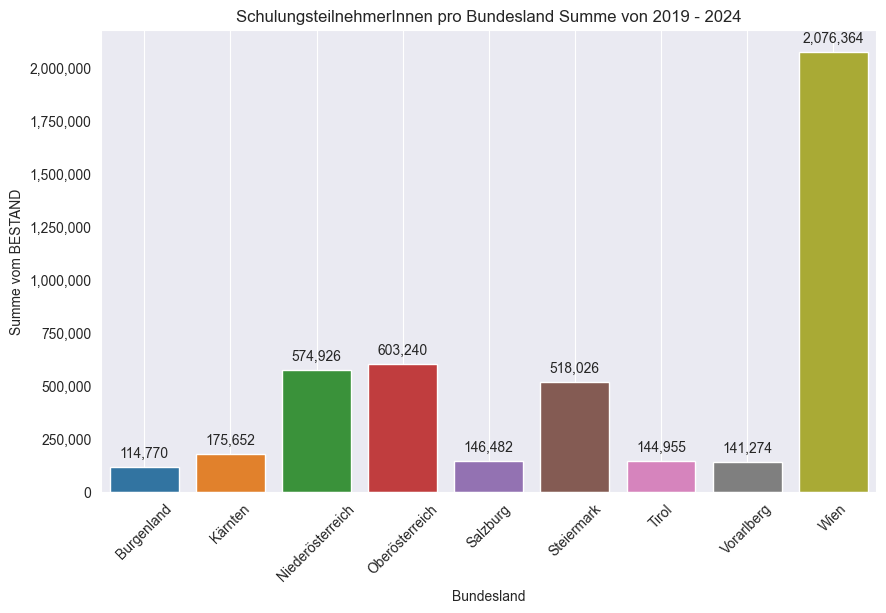

In [40]:
# Anzahl der SchulungsteilnehmerInnen pro Bundesland in Summe von 2019 bis 2024

grouped_data = merged_df.groupby('Bundesland')['BESTAND'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Bundesland', y='BESTAND', hue='Bundesland')

plt.title('SchulungsteilnehmerInnen pro Bundesland Summe von 2019 - 2024')
plt.ylabel('Summe vom BESTAND')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5)

plt.grid()
plt.show()

In [ ]:
#grouped_data = geo_df.groupby(['Bundesland'])['BESTAND'].sum().reset_index()
#grouped_data
#grouped_data = geo_df.dissolve(by='Bundesland', aggfunc='sum', as_index=False)

# To ensure the 'BESTAND' column is summed and geometry is retained
#grouped_data['BESTAND'] = geo_df.groupby('Bundesland')['BESTAND'].sum().values
#grouped_data

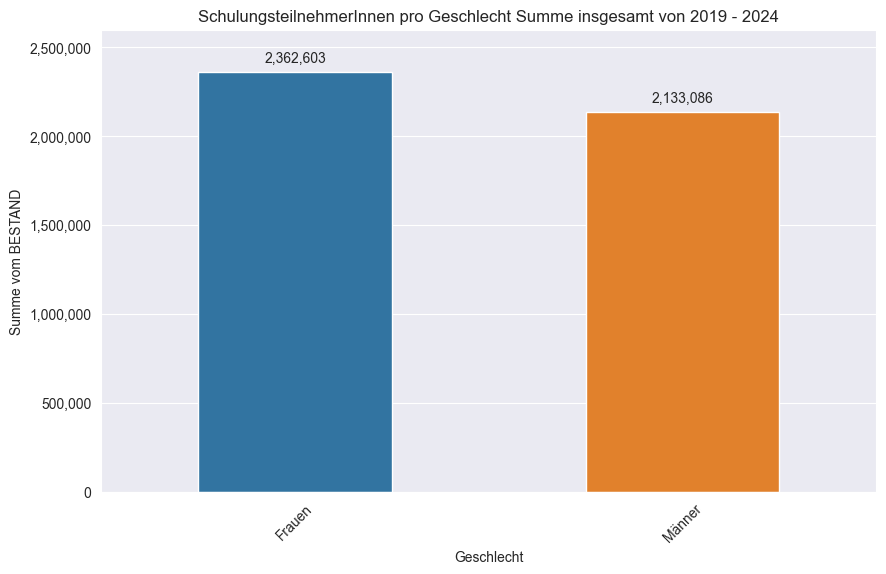

In [41]:
# Anzahl der SchulungsteilnehmerInnen pro Geschlecht in Summe von 2019 bis 2024
grouped_data = merged_df.groupby('Geschlecht', observed = False)['BESTAND'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Geschlecht', y='BESTAND', width=0.5, hue='Geschlecht')

plt.title('SchulungsteilnehmerInnen pro Geschlecht Summe insgesamt von 2019 - 2024')
plt.ylabel('Summe vom BESTAND')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

max_value = grouped_data['BESTAND'].max()
plt.ylim(0, max_value * 1.1)

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5)

plt.show()

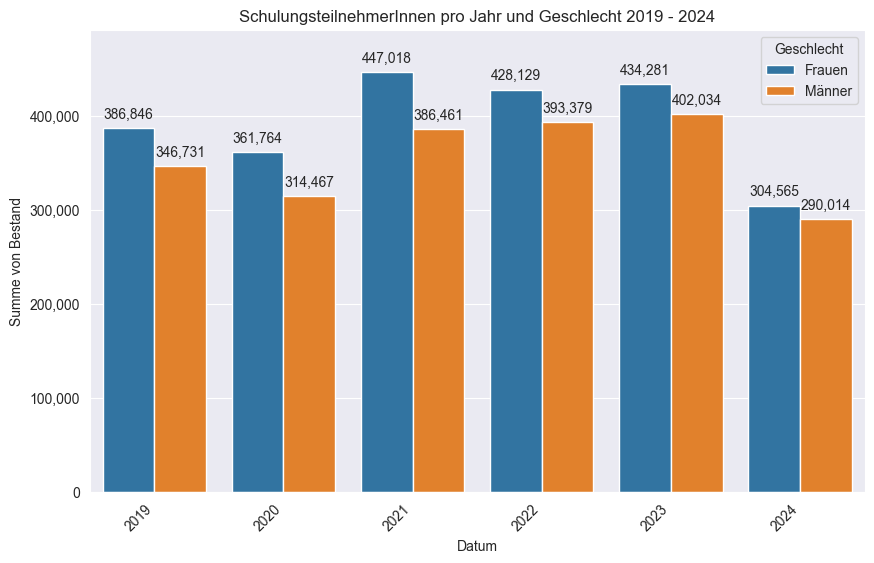

In [42]:
# Anzahl der SchulungsteilnehmerInnen pro Jahr und Geschlecht 2019 bis 2024
grouped_data = merged_df.groupby([merged_df['Datum'].dt.year, 'Geschlecht'], observed=False)['BESTAND'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Datum', y='BESTAND', hue='Geschlecht')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Summe von Bestand')
plt.title('SchulungsteilnehmerInnen pro Jahr und Geschlecht 2019 - 2024')

max_value = grouped_data['BESTAND'].max()
plt.ylim(0, max_value * 1.1)

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5)



In [43]:
# Vorbereitung der Daten für Plot 
grouped_data = merged_df.groupby(['Altersgruppe', 'Alter_von','Geschlecht'], observed=True)['BESTAND'].sum().reset_index()
# Bestände von 0 sind immer überflüssige Rows
grouped_data.drop(grouped_data[grouped_data['BESTAND'] == 0].index, inplace=True)
grouped_data.sort_values(by='Alter_von', inplace=True)
grouped_data

Altersgruppe  Alter_von Geschlecht  BESTAND
20        bis 19 Jahre          0     Frauen   361261
21        bis 19 Jahre          0     Männer   502150
0      20 bis 24 Jahre         20     Frauen   400062
1      20 bis 24 Jahre         20     Männer   466050
2      25 bis 29 Jahre         25     Frauen   283716
3      25 bis 29 Jahre         25     Männer   262124
4      30 bis 34 Jahre         30     Frauen   302513
5      30 bis 34 Jahre         30     Männer   223481
6      35 bis 39 Jahre         35     Frauen   306710
7      35 bis 39 Jahre         35     Männer   187698
8      40 bis 44 Jahre         40     Frauen   263007
9      40 bis 44 Jahre         40     Männer   148498
10     45 bis 49 Jahre         45     Frauen   208437
11     45 bis 49 Jahre         45     Männer   124024
12     50 bis 54 Jahre         50     Frauen   151311
13     50 bis 54 Jahre         50     Männer   107619
15     55 bis 59 Jahre         55     Männer    83950
14     55 bis 59 Jahre         55     Frauen    81468
16     60 bis 64 Jahre         60     Frauen     3938
17     60 bis 64 Jahre         60     Männer    27121
19  65 Jahre und älter         65     Männer      371
18  65 Jahre und älter         65     Frauen      180

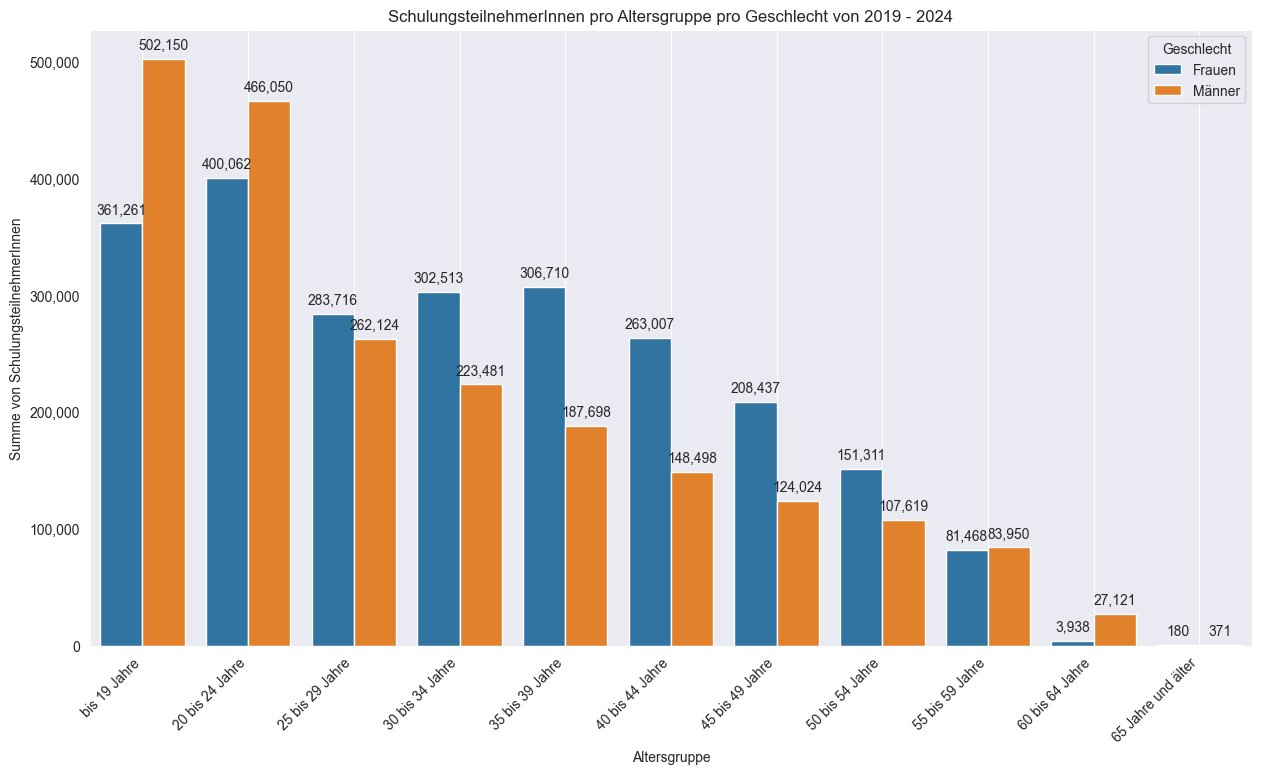

In [44]:
# Anzahl der SchulungsteilnehmerInnen pro Altersgruppe pro Geschlecht von 2019 bis 2024
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=grouped_data, x='Altersgruppe', y='BESTAND', hue='Geschlecht')

plt.title('SchulungsteilnehmerInnen pro Altersgruppe pro Geschlecht von 2019 - 2024')
plt.ylabel('Summe von SchulungsteilnehmerInnen')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5, )

plt.grid()
plt.show()

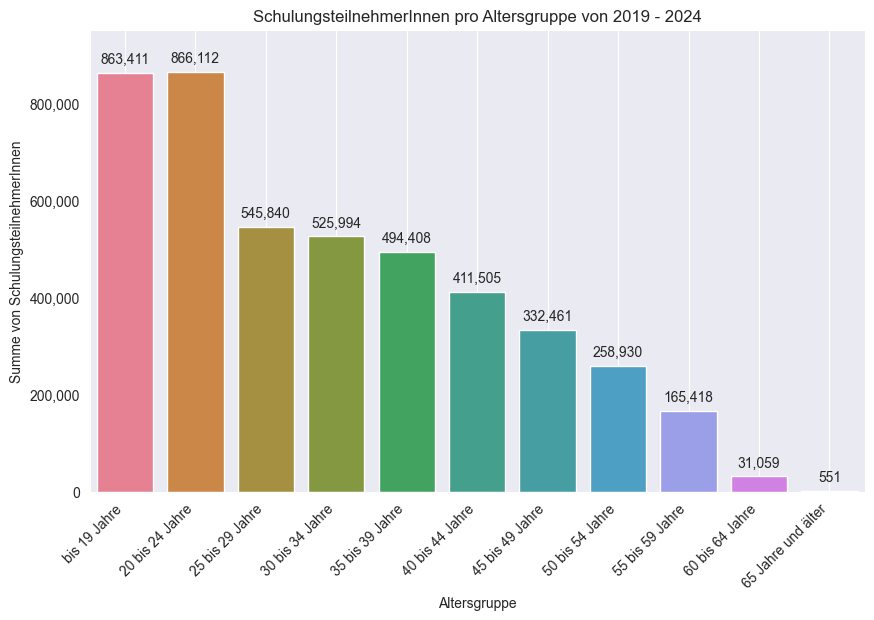

In [45]:
# Anzahl der SchulungsteilnehmerInnen pro Altersgruppe von 2019 bis 2024
grouped_data = merged_df.groupby(['Altersgruppe', 'Alter_von'])['BESTAND'].sum().reset_index().sort_values(by='Alter_von')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Altersgruppe', y='BESTAND', hue='Altersgruppe')

plt.title('SchulungsteilnehmerInnen pro Altersgruppe von 2019 - 2024')
plt.ylabel('Summe von SchulungsteilnehmerInnen')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

max_value = grouped_data['BESTAND'].max()
plt.ylim(0, max_value * 1.1)

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5)

plt.grid()
plt.show()

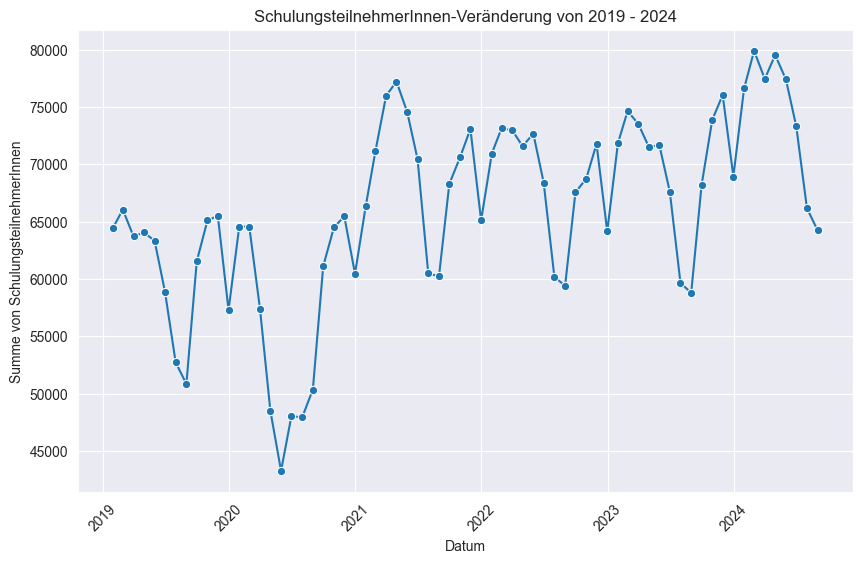

In [46]:
# Veränderung der Anzahl der SchulungsteilnehmerInnen von 2019 bis 2024
grouped_data = df.groupby('Datum')['BESTAND'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Datum', y='BESTAND', marker='o')

plt.title('SchulungsteilnehmerInnen-Veränderung von 2019 - 2024')
plt.xlabel('Datum')
plt.ylabel('Summe von SchulungsteilnehmerInnen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

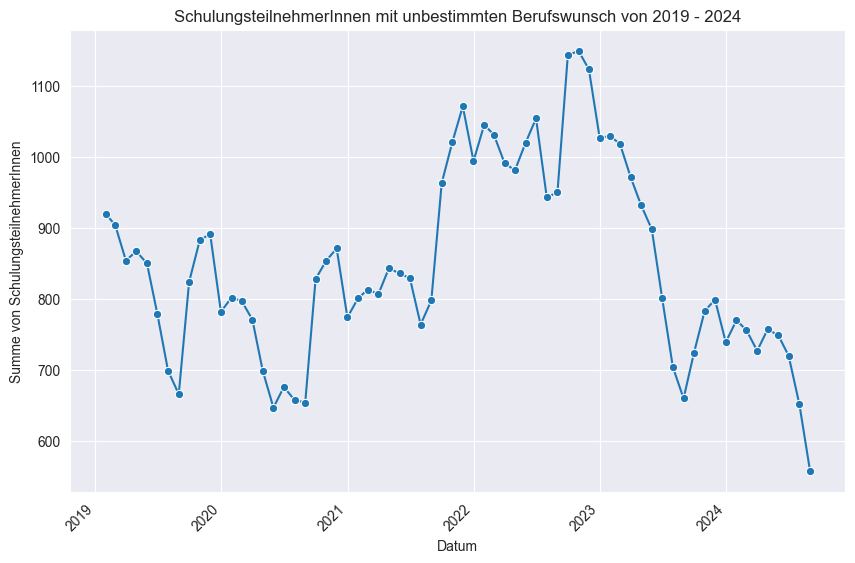

In [47]:
# Anzahl der SchulungsteilnehmerInnen mit unbestimmtem Berufswunsch von 2019 bis 2024
grouped_data = df_unbest.groupby(['Datum'])['BESTAND'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=grouped_data, x='Datum', marker='o', y='BESTAND')

plt.title('SchulungsteilnehmerInnen mit unbestimmten Berufswunsch von 2019 - 2024')
plt.ylabel('Summe von SchulungsteilnehmerInnen')
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()

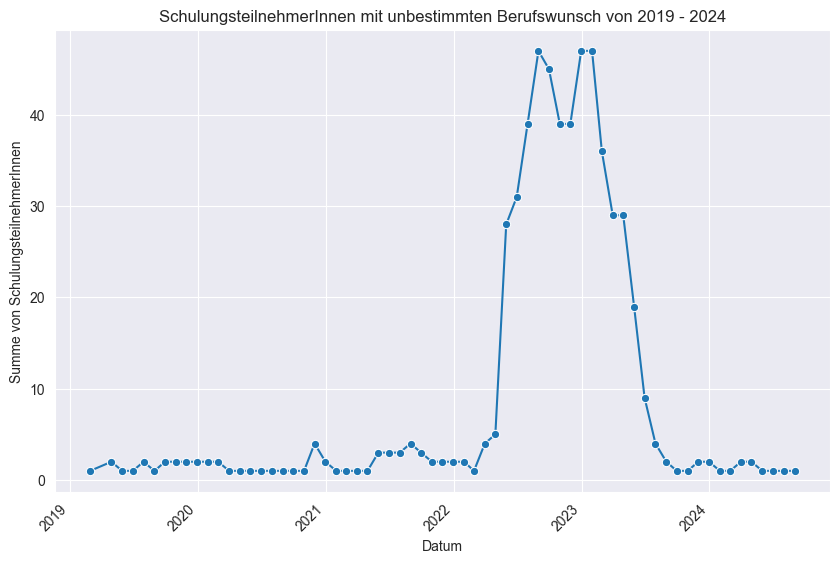

In [48]:
# Anzahl der SchulungsteilnehmerInnen mit NaN Berufswunsch von 2019 bis 2024
grouped_data = df_nan.groupby(['Datum'])['BESTAND'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=grouped_data, x='Datum', marker='o', y='BESTAND')

plt.title('SchulungsteilnehmerInnen mit unbestimmten Berufswunsch von 2019 - 2024')
plt.ylabel('Summe von SchulungsteilnehmerInnen')
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()

In [49]:
# Anzahl der SchulungsteilnehmerInnen pro Berufsobergruppe von 2019 bis 2024
grouped_data = merged_df.groupby(['Berufsobergruppe'])['BESTAND'].sum().reset_index()
ilp = px.bar(grouped_data, 
    x='Berufsobergruppe', 
    y='BESTAND', 
    color='Berufsobergruppe',
    title="SchulungsteilnehmerInnen pro Berufsobergruppe von 2019 - 2024",
    labels={"Berufsobergruppe": "Obergruppen der Berufe", "BESTAND": "Bestand"} # labels the axes
    )


# add legend
ilp.update_layout(
    xaxis=dict(showticklabels=False),
    legend_title_text='Berufsobergruppe', 
    width=1200, 
    height=600,
    legend=dict(
        orientation="v", # vertical
        font=dict(size=10)
    )
)

ilp.show()


In [50]:
# Anzahl der SchulungsteilnehmerInnen pro Berufsobergruppe von 2019 bis 2024
grouped_data = merged_df.groupby(['Berufsobergruppe'])['BESTAND'].sum().reset_index()

fig = px.treemap(
    grouped_data, 
    path=['Berufsobergruppe'],
    values='BESTAND',
    title='SchulungsteilnehmerInnen pro Berufsobergruppe von 2019 - 2024',
    color='BESTAND',
    color_continuous_scale='Viridis'
)

# Update layout to ensure clear labeling
fig.update_traces(textinfo='label+value+percent entry')  # Show label, value, and percentage on each box
fig.update_traces(hovertemplate='<b>Label:</b> %{label}<br>'
                                '<b>Value:</b> %{value}<br>'
                                '<b>Percentage:</b> %{percentRoot:.0%}<extra></extra>')

fig.show()

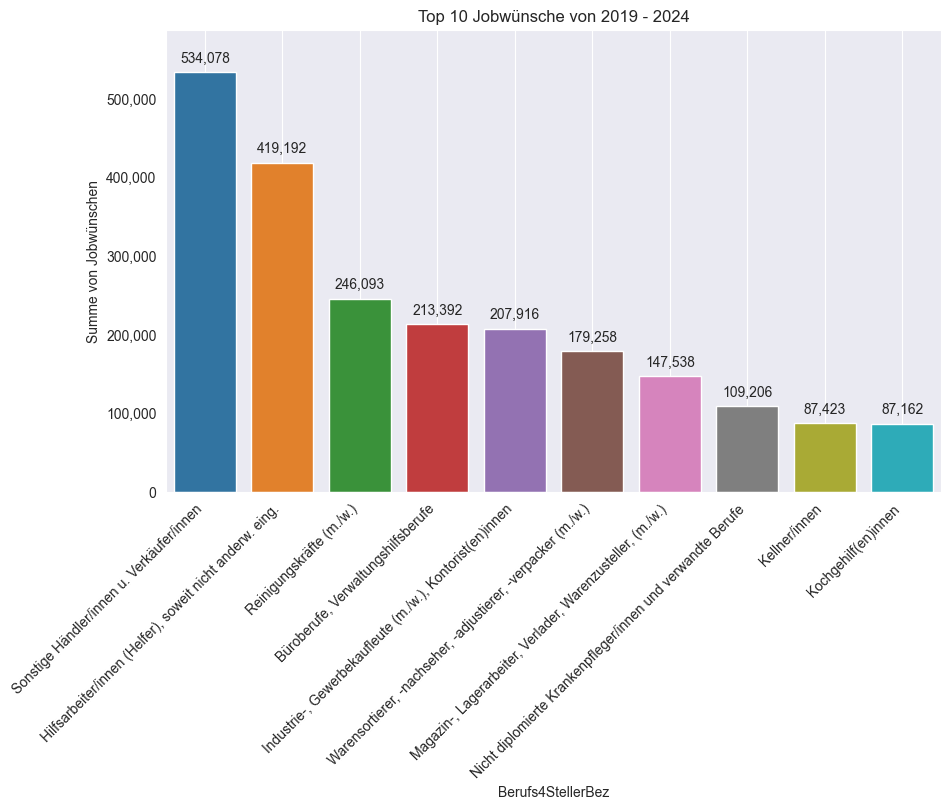

In [51]:
# Top 10 Jobwünsche von 2019 bis 2024
grouped_data = merged_df.groupby(['Berufs4StellerBez'])['BESTAND'].sum().reset_index().sort_values(by='BESTAND', ascending=False)
grouped_data = grouped_data[:10]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_data, x='Berufs4StellerBez', y='BESTAND', hue='Berufs4StellerBez')

plt.title('Top 10 Jobwünsche von 2019 - 2024')
plt.ylabel('Summe von Jobwünschen')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

max_value = grouped_data['BESTAND'].max()
plt.ylim(0, max_value * 1.1)

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=5)

plt.grid()
plt.show()

In [52]:
# Top 3 Berufswünsche pro Jahr auswählen
grouped_data = merged_df.groupby([merged_df['Datum'].dt.year, 'Berufs4StellerBez'])['BESTAND'].sum().reset_index()
grouped_data = grouped_data.groupby('Datum').apply(lambda x: x.nlargest(3, 'BESTAND')).reset_index(drop=True)

grouped_data

C:\Users\Marlis Tiefengraber\AppData\Local\Temp\ipykernel_12296\2578266094.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Datum                                  Berufs4StellerBez  BESTAND
0    2019          Sonstige Händler/innen u. Verkäufer/innen   100493
1    2019  Hilfsarbeiter/innen (Helfer), soweit nicht and...    67171
2    2019  Industrie-, Gewerbekaufleute (m./w.), Kontoris...    37369
3    2020          Sonstige Händler/innen u. Verkäufer/innen    88203
4    2020  Hilfsarbeiter/innen (Helfer), soweit nicht and...    60458
5    2020  Industrie-, Gewerbekaufleute (m./w.), Kontoris...    34909
6    2021          Sonstige Händler/innen u. Verkäufer/innen   101850
7    2021  Hilfsarbeiter/innen (Helfer), soweit nicht and...    72327
8    2021                           Reinigungskräfte (m./w.)    50780
9    2022          Sonstige Händler/innen u. Verkäufer/innen    93452
10   2022  Hilfsarbeiter/innen (Helfer), soweit nicht and...    85142
11   2022                           Reinigungskräfte (m./w.)    50072
12   2023          Sonstige Händler/innen u. Verkäufer/innen    89193
13   2023  Hilfsarbeiter/innen (Helfer), soweit nicht and...    79922
14   2023                           Reinigungskräfte (m./w.)    46373
15   2024          Sonstige Händler/innen u. Verkäufer/innen    60887
16   2024  Hilfsarbeiter/innen (Helfer), soweit nicht and...    54172
17   2024                           Reinigungskräfte (m./w.)    31016

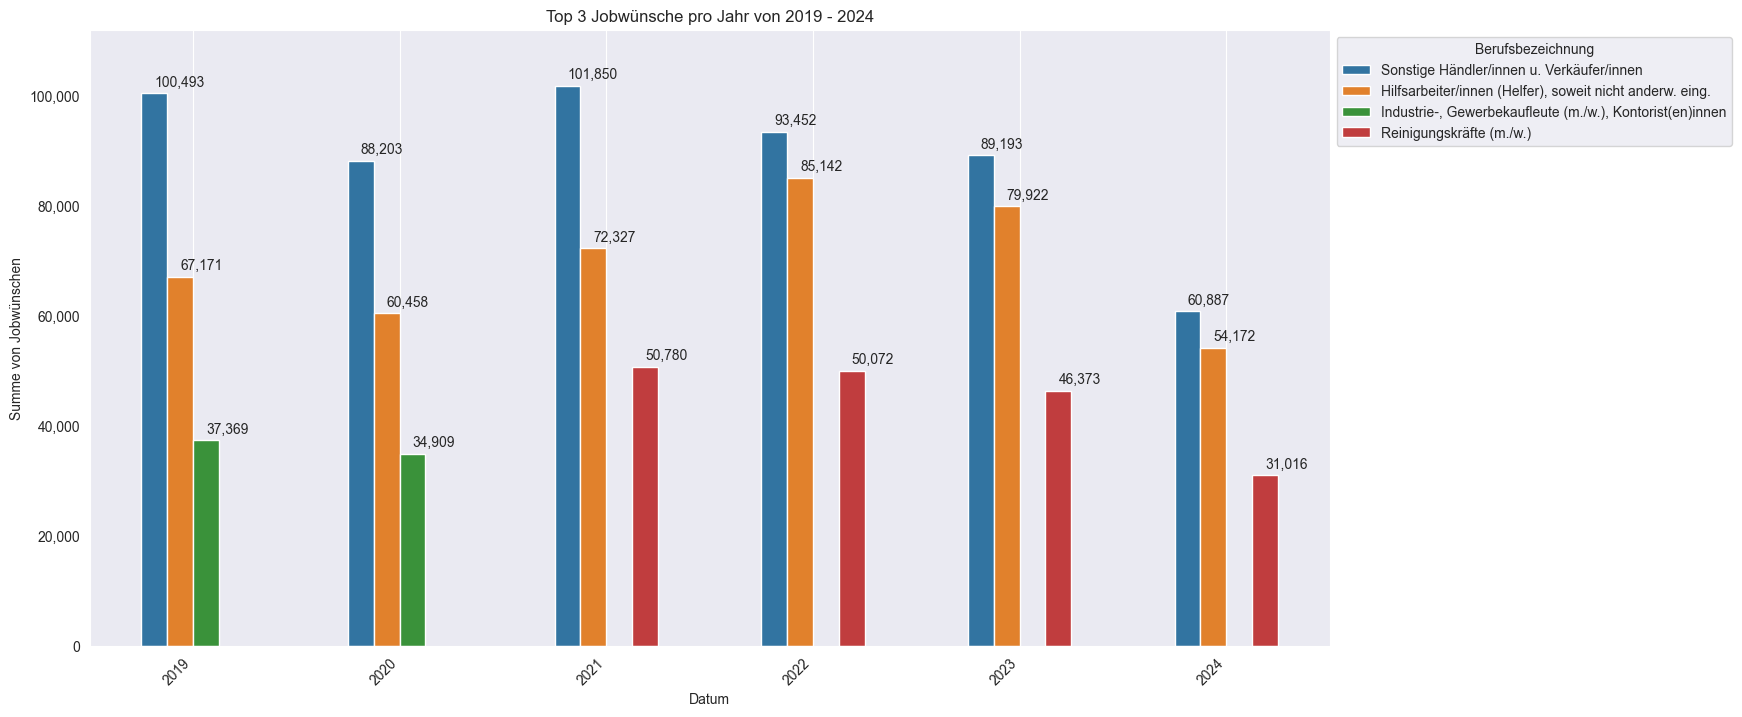

In [53]:
# Top 3 Jobwünsche pro Jahr von 2019 bis 2024
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=grouped_data, x='Datum', y='BESTAND', hue='Berufs4StellerBez', width=0.5)

plt.title('Top 3 Jobwünsche pro Jahr von 2019 - 2024')
plt.ylabel('Summe von Jobwünschen')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

max_value = grouped_data['BESTAND'].max()
plt.ylim(0, max_value * 1.1)

for container in ax.containers:
    labels = ax.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)
    for label in labels:
        #label.set_rotation(45)
        label.set_horizontalalignment('left')     
    
plt.legend(title='Berufsbezeichnung', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
plt.show()

## E3 - Formulate hypotheses

*Note: Read this section entirely and understand it - every group member.*

A hypothesis is an idea or explanation for something that is based on known facts but has not yet been proved. A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on facts (the data). https://gradcoach.com/what-is-a-research-hypothesis-or-scientific-hypothesis/

Formulate *N* non-trivial hypotheses, 1 per group member, and regard the following criteria: 
- State the hypothesis explicitly in concise language. 
- The hypothesis must be **motivated** by either **EDA results** or **literature** (citation in the report needed).
- The hypothesis must refer to **endpoints** that are **testable**. Specifically, the endpoint must be derived from the data.
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.
- If you decide to use a statistical test, use it properly. In particular, check the validity and comparability of the samples.

Do not:
- State nebulous, vague hypotheses. These don't contain endpoints and are unclear to test (i.e., answer).
- Use post-hoc hypotheses. Portraying an empirically inspired **post hoc hypothesis as a priori** violates the **falsification principle** crucial for hypothesis-driven (that is, confirmatory) empirical research. Falsification is severe scientific fraud.
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".
- Try to **produce positively tested hypotheses**. If a well motivated hypothesis is negative, this is an important finding (see Simpson's Paradox). The value of a tested hypothesis lies in the information or learning it provides.

Example: The homework with Simpson's Paradox. The pooled overall comparison between the genders would be the EDA motivating the hypothesis: "At UC Berkeley the by-department admissions rate for females is lower than for males." It should be tested using samples of department admission rates for the 2 **groups** male and female. No steps of the test should be done in EDA (or a priory to stating the hypothesis). The groups should be compared graphically, e.g., via a stripplot overlayed with a boxplot. The figure should be labelled properly and exported for the report. A (paired) t-test **may** be used (it's optional) to test this hypothesis statistically. For different data (e.g., time series) different approaches may be required. You don't have to use statistical tests, in particular if you don't know what they are doing.


### E3-H1: "xxx"
Author: Group member 1


In [54]:
# hypothesen:
# Anzahl der Frauen, die Ausb. im Bereich Technik machen, ist von 2019 bis 2024 signifikant angestiegen
# Anzahl der Frauen, die Ausb. im Bereich Technik machen, ist in Wien (und Graz) signifikant höher als im Rest Österreichs

### E3-H2: "xxx"
Author: Group member 2



### E3-H3: "xxx"
Author: Group member 3


### E3-H4: "xxx"
Author: Group member 4


### E3-H5: "xxx"
Author: Group member 5
